# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [41]:
# Libraries
import pandas as pd 
from sqlalchemy import create_engine
import pymysql
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [42]:
# your code here

driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'employees'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'

In [43]:
engine = create_engine(connection_string)
query = 'SELECT * FROM employees'

In [44]:
employees = pd.read_sql(query,engine)
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [45]:
# Method 1
# your code here
employees.groupby("Department")[["Salary"]].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [46]:
# Method 2
# your code here
pd.pivot_table(employees, index="Department", aggfunc="mean")[["Salary"]]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [47]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], aggfunc="mean")[["Salary"]]

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [48]:
# your code here
pd.pivot_table(employees, index=["Title"], values = ["Salary"], columns = "Years", fill_value = 0)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [50]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], aggfunc={"Salary": "mean", "Name": "count"})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [57]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], values = ["Salary"], aggfunc= ["median", "max", "min", "std"])

median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

Since the min and the max are the same in some cases, the std is NaN.


#### Based on your comments, fill the missing values with an appropriate value.

In [63]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], values = ["Salary"], aggfunc= {"Salary": ["median", "max", "min", "std"]}, fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [65]:
# your code here
pd.pivot_table(employees, index=["Department"], aggfunc={"Salary": "sum", "Name": "count"})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [66]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], aggfunc={"Salary": "mean", "Years": "sum"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [67]:
# your code here
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'fitbit'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'

In [68]:
engine = create_engine(connection_string)
query = 'SELECT * FROM fitbit'

In [69]:
fitbit = pd.read_sql(query,engine)
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.0,275,49,79,236,377,33,18,410\r
363,04-05-2016,3525,16382,12.39,16,684.0,333,10,55,2075,406,21,8,427\r
364,05-05-2016,3649,21913,16.4,19,701.0,287,29,90,2249,280,35,15,315\r
365,06-05-2016,3539,19023,14.79,15,575.0,298,8,85,2112,370,42,22,412\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [72]:
# your code here
fitbit.dtypes #or .info()
fitbit.describe()

,Calorie burned,Steps,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,11.724796,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185
std,916.307036,5594.836225,10.337370,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622
min,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,5.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000
50%,2974.000000,10413.000000,11.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000
75%,3233.000000,13916.500000,16.000000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000
max,4351.000000,26444.000000,101.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [73]:
# your code here
fitbit.corr()

,Calorie burned,Steps,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
Calorie burned,1.000000,0.255305,0.130757,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490
Steps,0.255305,1.000000,0.306511,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591
Floors,0.130757,0.306511,1.000000,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459
Minutes Lightly Active,0.209540,0.393010,-0.085992,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150
Minutes Fairly Active,0.188256,0.303244,0.278408,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498
Minutes Very Active,0.197881,0.571452,0.399503,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859
Activity Calories,-0.130758,-0.160568,-0.155532,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757
MinutesOfSleep,0.011485,0.130986,0.069464,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512
MinutesOfBeingAwake,0.041999,0.124846,0.064587,0.096107,0.104303,0.116559,0.010859,0.779595,1.000000,0.951817
NumberOfAwakings,0.030490,0.106591,0.043459,0.087150,0.100498,0.099859,0.022757,0.780512,0.951817,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [76]:
import matplotlib.pyplot as plt;

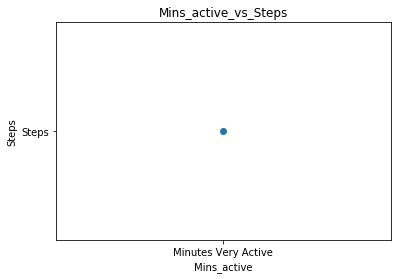

In [77]:
plt.scatter("Minutes Very Active", "Steps")
plt.title("Mins_active_vs_Steps")
plt.xlabel("Mins_active")
plt.ylabel("Steps")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""